# Diabetes classifier

# Install Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from pandas.plotlib import scatter_matrix 
from sklearn import linear_model,metrics,model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import classification_report

# Data preparation and initial analysis

Here we focus on preparing and analyzing health indicator data for diabetes from the year 2015 and 2021.The goal is to combine these datasets to from a comprehensive views of the data, which can be better use for the machine learning.The following are taken:

1.Import libraries

2.Load the Data

3.Combine the DataFrames

In [7]:
# file names and ulrs
#filepath_2015='http://localhost:8888/edit/Downloads/2015.csv'
#filepath_2021='http://localhost:8888/edit/Downloads/2021.csv'
df1=pd.read_csv("Downloads/2015.csv")
df2=pd.read_csv("Downloads/2021.csv")

#Combine the two DataFrame
combined_df=pd.concat([df1,df2],axis=0).reset_index(drop=True)

In [8]:
# Display the first few data of combined dataframe
combined_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [9]:
combined_df.shape

(137828, 22)

# Removing Features

Here we remove features deemed irrelevant for modeling purposes.we specify a list of columns to be removed and then drop there columns from the combinedd DataFrame

In [10]:
# Removes irrelevent features from dataset
columns_to_remove=['CholCheck','AnyHealthcare','NoDocbcCost','Education','Income']
reduced_df=combined_df.drop(columns=columns_to_remove)
reduced_df.head()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,0.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0
1,0.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0
2,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0
3,0.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0
4,0.0,0.0,0.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0


# Check for the Missing Values

check for the missing values in the dataset.Note there are no missing values will found.

In [11]:
# check for the missing values in the dataset
missing_values=reduced_df.isnull().sum()
missing_values

Diabetes_binary         0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

In [12]:
reduced_df.describe()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
count,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000
mean,0.500000,0.556084,0.513299,30.067098,0.458165,0.060561,0.142366,0.709965,0.608933,0.799409,0.045832,2.806723,3.985264,5.482275,0.242244,0.474744,8.543961
std,0.500002,0.496846,0.499825,7.108331,0.498249,0.238524,0.349426,0.453780,0.487991,0.400444,0.209122,1.094795,8.241093,9.842604,0.428443,0.499364,2.935200
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,0.500000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,5.000000,0.000000,1.000000,11.000000
max,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000


In [13]:
# check range of values of specified features to determine suitable data types
features_to_optimize=['BMI','GenHlth','MentHlth','PhysHlth','Age']
data_types_optimization=(reduced_df[features_to_optimize].describe().loc[['min','max']])


#memory used before reducing data types
memory_before=reduced_df.memory_usage(index=True).sum()

data_types_optimization

,BMI,GenHlth,MentHlth,PhysHlth,Age
min,12.0,1.0,0.0,0.0,1.0
max,99.0,5.0,30.0,30.0,13.0


# Data Type Conversion for Efficiency
We enhance the dataset's memory efficiency by converting specified binary columns to boolean data types. We print the memory usage before and after the operation to demonstrate the effectiveness of this optimization in reducing the dataset's memory consumption.

In [14]:
binary_columns = ['Diabetes_binary', 'HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Sex']
for column in binary_columns:
    reduced_df[column] = reduced_df[column].astype('bool')

# After data types reduces memory size
memory_after = reduced_df.memory_usage(index=True).sum()

print("Dataframe memory used before:", memory_before)
print("Dataframe memory used after:  ", memory_after)

Dataframe memory used before: 18744740
Dataframe memory used after:   7167188


# Logistic Regression Model for Diabetes Prediction
Here we prepare data for machine learning, specifically using a logistic regression model to predict diabetes. First, numerical columns are identified and scaled using MinMaxScaler to ensure all features contribute equally to the model without bias from varying scales. A logistic regression model is then initialized with specific parameters. The dataset is split into features (X_log) and the target variable (y_log). The data is further divided into training and test sets to evaluate the model's performance on unseen data.

After training the logistic regression model, predictions are made on the test set. The model's effectiveness is assessed using accuracy, confusion matrix, and classification report, providing a comprehensive overview of its predictive capabilities in distinguishing between diabetic and non-diabetic individuals

In [15]:
###### Logistic Regression algorithm ######

# Selecting numerical columns (excluding binary/boolean columns)
numerical_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
reduced_df[numerical_columns] = scaler.fit_transform(reduced_df[numerical_columns])

mylog_model = linear_model.LogisticRegression(solver='saga', max_iter=1000)

# 'X' is the feature set and 'y' is the target variable
X_log = reduced_df.drop('Diabetes_binary', axis=1)
y_log = reduced_df['Diabetes_binary'].astype('bool')  # Ensuring the target is boolean

# Splitting the dataset into the Training set and Test set
X_log_train, X_log_test, y_log_train, y_log_test = model_selection.train_test_split(X_log, y_log, test_size=0.25, random_state=42)

mylog_model.fit(X_log_train, y_log_train)

y_pred_log = mylog_model.predict(X_log_test)

# Evaluate the model
accuracy = accuracy_score(y_log_test, y_pred_log)
conf_matrix = confusion_matrix(y_log_test, y_pred_log)
class_report = classification_report(y_log_test, y_pred_log)

print("\nLogistic Regression prediction results:")
print(f"Accuracy: {round(accuracy*100,2)} %")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Logistic Regression prediction results:
Accuracy: 74.58 %
Confusion Matrix:
[[12556  4657]
 [ 4101 13143]]
Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.73      0.74     17213
        True       0.74      0.76      0.75     17244

    accuracy                           0.75     34457
   macro avg       0.75      0.75      0.75     34457
weighted avg       0.75      0.75      0.75     34457



In [19]:
# USER INTERFACE: form for input for patient prediction
import ipywidgets as widgets

# 'features_dict' is a dictionary mapping feature to description
features_dict = {
    "Sex": "Sex:",
    "Age": "Age category (1 = 18-24, 13 = 80 or older; see table):",
    "BMI": "Body Mass Index:",
    "HighBP": "High Blood Pressure",
    "HighChol": "High Cholesterol",
    "Smoker": "Have you smoked at least 100 cigarettes in your life?",
    "HvyAlcoholConsump": "Heavy drinkers (drinks <14 for men, <7 for women per week",
    "Stroke": "(Ever told) you had a Stroke?",
    "HeartDiseaseorAttack": "Heart Disease or Attack (CHD or MI)",
    "GenHlth": "General Health scale :",
    "MentHlth": "How many past days was your Mental Health not good?",
    "PhysHlth": "How many past days was your Physical Health not good?",
    "DiffWalk": "Do you have Difficulty Walking or climbing stairs?",
    "PhysActivity": "Physical Activity in past 30 days, not incl job",
    "Fruits": "Eat 1 Fruit or more per day",
    "Veggies": "Eat Veggies 1 or more per day",
}
widgets_dict = {}

# Create widgets for each feature
for item in features_dict.keys():
    if item in [
        "HighBP",
        "HighChol",
        "Smoker",
        "Stroke",
        "HeartDiseaseorAttack",
        "PhysActivity",
        "Fruits",
        "Veggies",
        "HvyAlcoholConsump",
        "DiffWalk",
    ]:
        # Binary features: create a dropdown with options 'Yes' and 'No'
        widgets_dict[item + "_label"] = widgets.Label(
            features_dict.get(item), layout={"width": "max-content"}
        )
        widgets_dict[item] = widgets.RadioButtons(
            options={"No": 0, "Yes": 1},
            value=0,
        )
    if item in ["Sex"]:
        # Create a dropdown with options 'Male' and 'Female'
        widgets_dict[item + "_label"] = widgets.Label(
            features_dict.get(item), layout={"width": "max-content"}
        )
        widgets_dict[item] = widgets.Dropdown(
            options=[("Female", 0), ("Male", 1)],
            value=0,
        )
        # Numerical features: create float sliders
    if item in ["BMI"]:
        widgets_dict[item + "_label"] = widgets.Label(
            features_dict.get(item), layout={"width": "max-content"}
        )
        widgets_dict[item] = widgets.FloatSlider(
            value=20.0,
            min=10,
            max=50.0,
            step=0.1,
        )
    if item in ["GenHlth"]:
        widgets_dict[item + "_label"] = widgets.Label(
            features_dict.get(item), layout={"width": "max-content"}
        )
        widgets_dict[item] = widgets.FloatSlider(
            value=3,
            min=1,
            max=5,
            step=1,
        )
    if item in ["MentHlth", "PhysHlth"]:
        widgets_dict[item + "_label"] = widgets.Label(
            features_dict.get(item), layout={"width": "max-content"}
        )
        widgets_dict[item] = widgets.FloatSlider(
            value=0,
            min=0,
            max=30,
            step=1,
        )
    if item in ["Age"]:
        widgets_dict[item + "_label"] = widgets.Label(
            features_dict.get(item), layout={"width": "max-content"}
        )
        widgets_dict[item] = widgets.FloatSlider(
            value=8,
            min=1,
            max=13,
            step=1,
        )
        # Button to make prediction
predict_btn = widgets.Button(description="Predict Patient Risk")

# Output widget to display prediction result
output = widgets.Output()


def on_predict_btn_clicked(b):
    # Prepare the input for the model
    input_data = [widgets_dict[feature].value for feature in features_dict.keys()]
    input_data = np.array(input_data).reshape(1, -1)

    # Create a DataFrame with input_data and assign column names using features
    input_df = pd.DataFrame(input_data, columns=features_dict.keys())

    # Ensure the DataFrame columns are in the correct order
    input_df = input_df[X_log.columns]

    # Apply the same scaling to the input as was done to the training data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    #### Make prediction ####
    prediction = mylog_model.predict(input_df)

    # Display prediction
    with output:
        output.clear_output()
        if prediction[0] == 0:
            print("Prediction: Not at risk of diabetes")
        else:
            print("Prediction: At risk of diabetes")


predict_btn.on_click(on_predict_btn_clicked)

# Display widgets
for widget in widgets_dict.values():
    display(widget)
display(predict_btn, output)


Label(value='Sex:', layout=Layout(width='max-content'))

Dropdown(options=(('Female', 0), ('Male', 1)), value=0)

Label(value='Age category (1 = 18-24, 13 = 80 or older; see table):', layout=Layout(width='max-content'))

FloatSlider(value=8.0, max=13.0, min=1.0, step=1.0)

Label(value='Body Mass Index:', layout=Layout(width='max-content'))

FloatSlider(value=20.0, max=50.0, min=10.0)

Label(value='High Blood Pressure', layout=Layout(width='max-content'))

RadioButtons(options={'No': 0, 'Yes': 1}, value=0)

Label(value='High Cholesterol', layout=Layout(width='max-content'))

RadioButtons(options={'No': 0, 'Yes': 1}, value=0)

Label(value='Have you smoked at least 100 cigarettes in your life?', layout=Layout(width='max-content'))

RadioButtons(options={'No': 0, 'Yes': 1}, value=0)

Label(value='Heavy drinkers (drinks <14 for men, <7 for women per week', layout=Layout(width='max-content'))

RadioButtons(options={'No': 0, 'Yes': 1}, value=0)

Label(value='(Ever told) you had a Stroke?', layout=Layout(width='max-content'))

RadioButtons(options={'No': 0, 'Yes': 1}, value=0)

Label(value='Heart Disease or Attack (CHD or MI)', layout=Layout(width='max-content'))

RadioButtons(options={'No': 0, 'Yes': 1}, value=0)

Label(value='General Health scale :', layout=Layout(width='max-content'))

FloatSlider(value=3.0, max=5.0, min=1.0, step=1.0)

Label(value='How many past days was your Mental Health not good?', layout=Layout(width='max-content'))

FloatSlider(value=0.0, max=30.0, step=1.0)

Label(value='How many past days was your Physical Health not good?', layout=Layout(width='max-content'))

FloatSlider(value=0.0, max=30.0, step=1.0)

Label(value='Do you have Difficulty Walking or climbing stairs?', layout=Layout(width='max-content'))

RadioButtons(options={'No': 0, 'Yes': 1}, value=0)

Label(value='Physical Activity in past 30 days, not incl job', layout=Layout(width='max-content'))

RadioButtons(options={'No': 0, 'Yes': 1}, value=0)

Label(value='Eat 1 Fruit or more per day', layout=Layout(width='max-content'))

RadioButtons(options={'No': 0, 'Yes': 1}, value=0)

Label(value='Eat Veggies 1 or more per day', layout=Layout(width='max-content'))

RadioButtons(options={'No': 0, 'Yes': 1}, value=0)

Button(description='Predict Patient Risk', style=ButtonStyle())

Output()

# Cross-Validation of Logistic Regression Model
Next we perform a cross-validation process on the logistic regression model to verify its reliability across different subsets of the dataset. By utilizing the KFold method with 5 splits and shuffling enabled, the dataset is divided into distinct subsets to conduct multiple training and testing cycles. The average of these scores is calculated and displayed, offering a robust measure of the model's overall performance. This approach helps to ensure that the model's predictive accuracy is not overly dependent on any particular partition of the data, thereby increasing confidence in its generalizability.

In [38]:
# Verify model by averaging different test/train splits
k_folds = KFold(n_splits = 5, shuffle=True)
# The number of folds determines the test/train split for each iteration. 
# So 5 folds has 5 different mutually exclusive training sets. 
# That's a 1 to 4 (or .20 to .80) testing/training split for each of the 5 iterations.

log_scores = cross_val_score(mylog_model, X_log, y_log)
# This shows the average score. Print 'scores' to see an array of individual iteration scores.
print("Logistic Regression Average Prediction Score: ", round(log_scores.mean()*100, 2), "%")

Logistic Regression Average Prediction Score:  74.26 %


# Confusion Matrix Visual
Confusion matrixes are used to evaluate the performance in classifying diabetic and non-diabetic individuals.

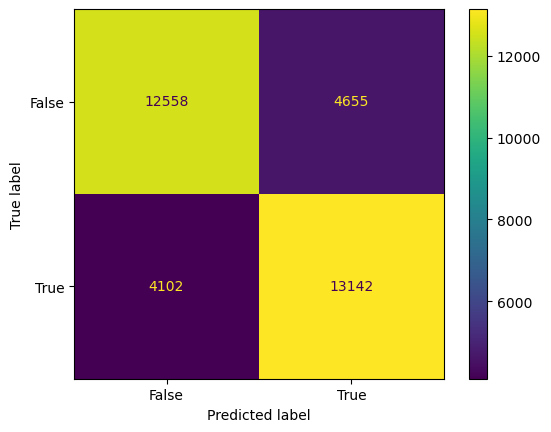

In [39]:
# Plot confusion matrix
graph_confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_log_test, y_pred_log)

# Histogram Visual
Here we generate histograms for all numerical data, providing a visual distribution analysis of each (non-binary) feature.

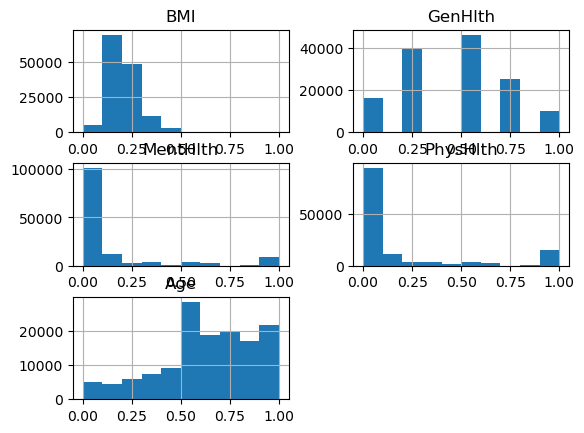

In [40]:
# Plot histogram
graph_histogram = reduced_df.hist()